# H-DHT11 and T-DHT11 measures 

by: Widya Meiriska

### 1. Read Dataset

In [4]:
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### H-DHT11-measures

In [5]:
data = []
with open('../data/raw/measures/H-DHT11-measures.json','r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [5]:
df.head()

,sensor,time,value
0,H-DHT11,2017-12-22T11:22:11Z,31
1,H-DHT11,2017-12-22T11:22:16Z,31
2,H-DHT11,2017-12-22T11:22:20Z,31
3,H-DHT11,2017-12-22T11:22:24Z,31
4,H-DHT11,2017-12-22T11:22:28Z,31


In [6]:
df.tail()

,sensor,time,value
1420297,H-DHT11,2018-03-13T11:41:53Z,33
1420298,H-DHT11,2018-03-13T11:41:57Z,33
1420299,H-DHT11,2018-03-13T11:42:01Z,33
1420300,H-DHT11,2018-03-13T11:42:05Z,33
1420301,H-DHT11,2018-03-13T11:42:09Z,33


#### T-DHT11-measures

In [7]:
df1 = pd.read_csv('../data/raw/measures/T-DHT11-measures.csv')

In [8]:
df1.head() 

,sensor,value,time
0,T-DHT11,27,2017-12-22T11:22:11Z
1,T-DHT11,28,2017-12-22T11:22:16Z
2,T-DHT11,28,2017-12-22T11:22:20Z
3,T-DHT11,28,2017-12-22T11:22:24Z
4,T-DHT11,28,2017-12-22T11:22:28Z


In [9]:
df1.tail() 

,sensor,value,time
1420303,T-DHT11,26,2018-03-13T11:41:53Z
1420304,T-DHT11,26,2018-03-13T11:41:57Z
1420305,T-DHT11,26,2018-03-13T11:42:01Z
1420306,T-DHT11,26,2018-03-13T11:42:05Z
1420307,T-DHT11,26,2018-03-13T11:42:09Z


### 2. Data Investigation

#### H-DHT11-measures

In [10]:
df.columns

Index(['sensor', 'time', 'value'], dtype='object')

In [11]:
df.count()

sensor    1420302
time      1420302
value     1420302
dtype: int64

In [12]:
df.isnull().sum()

sensor    0
time      0
value     0
dtype: int64

In [15]:
df.dtypes

sensor    object
time      object
value      int64
dtype: object

In [14]:
# Convert date format
df['time'] = pd.to_datetime(df['time'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420302 entries, 0 to 1420301
Data columns (total 3 columns):
sensor    1420302 non-null object
time      1420302 non-null datetime64[ns]
value     1420302 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.5+ MB


In [24]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
sensor,0,0.0
time,0,0.0
value,0,0.0


#### T-DHT11-measures

In [15]:
df1.columns

Index(['sensor', 'value', 'time'], dtype='object')

In [16]:
df1.count()

sensor    1420308
value     1420308
time      1420308
dtype: int64

In [18]:
df1.dtypes

sensor            object
value              int64
time      datetime64[ns]
dtype: object

In [19]:
# Convert date format
df1['time'] = pd.to_datetime(df1['time'])

In [20]:
df1.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420308 entries, 0 to 1420307
Data columns (total 3 columns):
sensor    1420308 non-null object
value     1420308 non-null int64
time      1420308 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.5+ MB


In [25]:
missingdf1 = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf1['percent'] = missingdf1['total'] / len(df1)
missingdf1

,total,percent
sensor,0,0.0
time,0,0.0
value,0,0.0


#### No missing data between data sensor T-DHT11-measures and H-DHT11-measures

### Merge T-DHT11-measures and H-DHT11-measures

T-DHT11 measures the temperature and H-DHT11 measures the humidity. Here I try to merge the data T-DHT11-measures and H-DHT11-measures, because it used the same type of sensor and the measurement time is almost the same

In [26]:
df.rename(columns={'sensor': 'humidity sensor','value' : 'H-DHT11'},inplace=True)

In [27]:
df.head()

,humidity sensor,time,H-DHT11
0,H-DHT11,2017-12-22 11:22:11,31
1,H-DHT11,2017-12-22 11:22:16,31
2,H-DHT11,2017-12-22 11:22:20,31
3,H-DHT11,2017-12-22 11:22:24,31
4,H-DHT11,2017-12-22 11:22:28,31


In [28]:
df1.rename(columns={'sensor': 'temperature sensor','value' : 'T-DHT11'},inplace=True)

In [29]:
df1.head()

,temperature sensor,T-DHT11,time
0,T-DHT11,27,2017-12-22 11:22:11
1,T-DHT11,28,2017-12-22 11:22:16
2,T-DHT11,28,2017-12-22 11:22:20
3,T-DHT11,28,2017-12-22 11:22:24
4,T-DHT11,28,2017-12-22 11:22:28


In [30]:
newdf =  pd.merge(df, df1, on='time', how='outer')

In [31]:
newdf.head()

,humidity sensor,time,H-DHT11,temperature sensor,T-DHT11
0,H-DHT11,2017-12-22 11:22:11,31.0,T-DHT11,27.0
1,H-DHT11,2017-12-22 11:22:16,31.0,T-DHT11,28.0
2,H-DHT11,2017-12-22 11:22:20,31.0,T-DHT11,28.0
3,H-DHT11,2017-12-22 11:22:24,31.0,T-DHT11,28.0
4,H-DHT11,2017-12-22 11:22:28,31.0,T-DHT11,28.0


Rearrange the columns

In [32]:
newdf = newdf.reindex(columns=['time','humidity sensor','H-DHT11','temperature sensor','T-DHT11'])
newdf = newdf[['time','humidity sensor','H-DHT11','temperature sensor','T-DHT11']]

In [33]:
data = newdf.drop(["humidity sensor", "temperature sensor"], axis=1)

In [34]:
data.head()

,time,H-DHT11,T-DHT11
0,2017-12-22 11:22:11,31.0,27.0
1,2017-12-22 11:22:16,31.0,28.0
2,2017-12-22 11:22:20,31.0,28.0
3,2017-12-22 11:22:24,31.0,28.0
4,2017-12-22 11:22:28,31.0,28.0


In [35]:
data.tail()

,time,H-DHT11,T-DHT11
1501869,2018-03-13 11:30:28,NaN,26.0
1501870,2018-03-13 11:30:49,NaN,26.0
1501871,2018-03-13 11:34:07,NaN,26.0
1501872,2018-03-13 11:36:55,NaN,26.0
1501873,2018-03-13 11:37:15,NaN,26.0


In [36]:
missingdata = pd.DataFrame(data.isna().sum()).rename(columns = {0: 'total'})
missingdata['percent'] = missingdata['total'] / len(data)
missingdata

,total,percent
time,0,0.000000
H-DHT11,81572,0.054313
T-DHT11,81566,0.054309


#### After merging the data from H-DHT11 and T-DHT11 sensor there are many missing data founded. Here I will try to interpolate the missing data.

Fill the NaN value on humidity value with intepolate data using time

In [37]:
data.set_index('time',inplace=True)
new_df = data.interpolate(method="time") 

In [38]:
new_df.tail()

,H-DHT11,T-DHT11
time,,
2018-03-13 11:30:28,33.0,26.0
2018-03-13 11:30:49,33.0,26.0
2018-03-13 11:34:07,33.0,26.0
2018-03-13 11:36:55,33.0,26.0
2018-03-13 11:37:15,33.0,26.0


In [39]:
missingnewdf1 = pd.DataFrame(new_df.isna().sum()).rename(columns = {0: 'total'})
missingnewdf1['percent'] = missingnewdf1['total'] / len(new_df)
missingnewdf1

,total,percent
H-DHT11,0,0.0
T-DHT11,0,0.0


In [41]:
new_df.count()

H-DHT11    1501874
T-DHT11    1501874
dtype: int64

#### After interpolate the data no more missing value and I assume the data is clean

### 3. Data Visualization

Text(0.5,1,'Time vs Temperature')

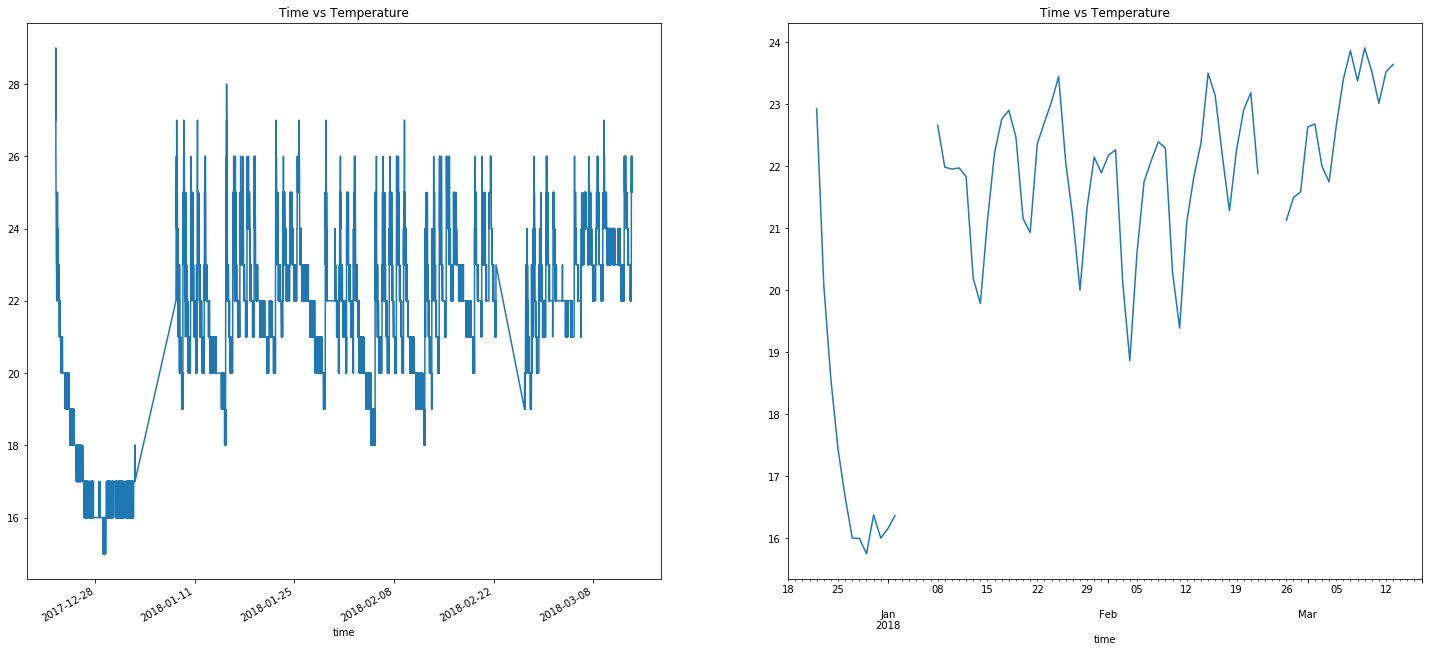

In [43]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df['T-DHT11'].plot()
plt.title('Time vs Temperature')

plt.subplot(2,2,2)
new_df['T-DHT11'].resample('D').mean().plot()
plt.title('Time vs Temperature')

Text(0.5,1,'Time vs Humidity')

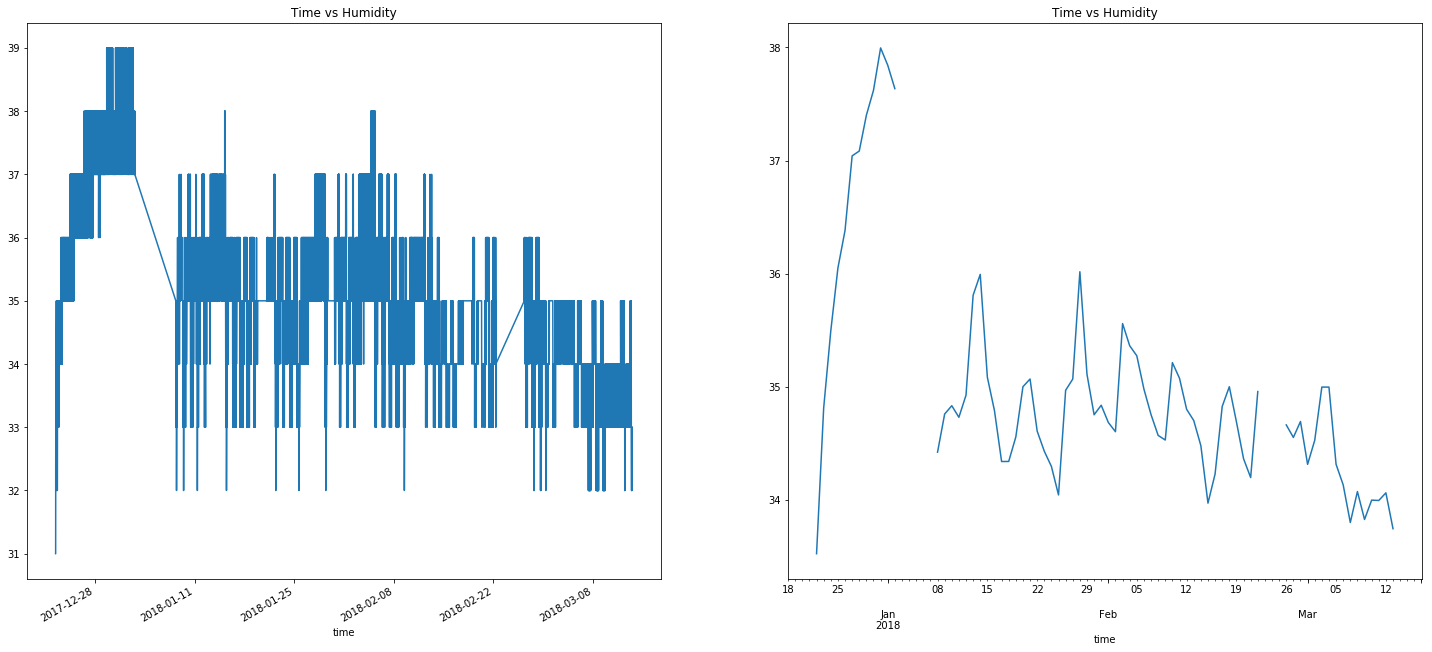

In [44]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df['H-DHT11'].plot()
plt.title('Time vs Humidity')

plt.subplot(2,2,2)
new_df['H-DHT11'].resample('D').mean().plot()
plt.title('Time vs Humidity')

#### We can see that there are some days when there is no measurement at all 